## Ejercicio 3.23
*Kassimali, A. (2012). Matrix Analysis of Structures. 2nd Edition. Cengage Learning.*

![NON](img/ejercicio_3.23.png)

In [1]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter

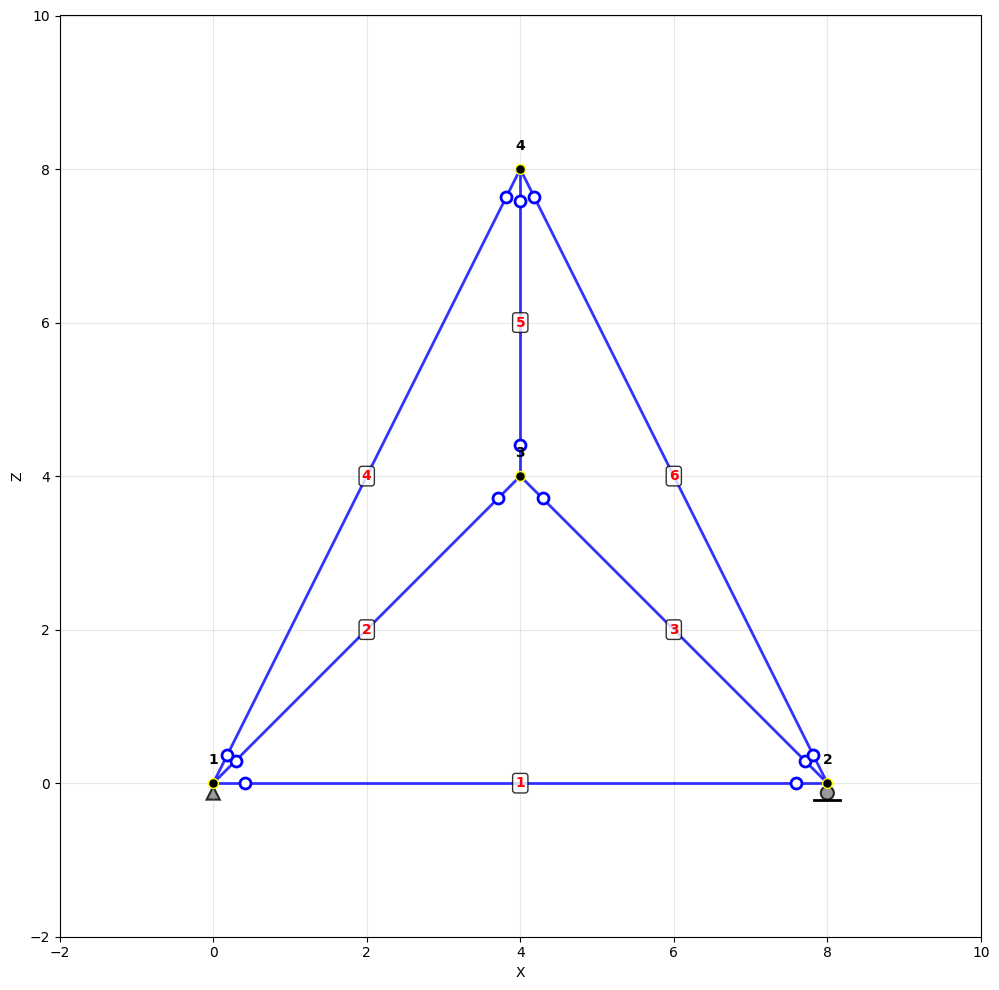

In [2]:
# Crear el sistema estructural
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

# Definir propiedades del material y secciones
E = 200 * 10 ** 6
A = 2000 *10**-6
I = 1

# Definición de Nodos (Geometría)
system.defineNode(1, x=0, z=0)
system.defineNode(2, x=8, z=0)
system.defineNode(3, x=4, z=4)
system.defineNode(4, x=4, z=8)

# Asignación de Restricciones (Condiciones de Apoyo)
system.assignJoint.restrictions(1, ux=True, uz=True, ry=False)
system.assignJoint.restrictions(2, ux=False, uz=True, ry=False)

# Definición de Elementos (Conectividad)
system.defineElement(1, 1, 2, A=A, E=E, I=I)
system.defineElement(2, 1, 3, A=A, E=E, I=I)
system.defineElement(3, 2, 3, A=A, E=E, I=I)
system.defineElement(4, 1, 4, A=A, E=E, I=I)
system.defineElement(5, 3, 4, A=A, E=E, I=I)
system.defineElement(6, 2, 4, A=A, E=E, I=I)

# Asignación de Cargas
system.assignJoint.force(4, fx=80, fz=-120, my=0)

# Configuración de Liberaciones en Elementos
for i in range(len(system.Elements)):
    system.assignElement.releases(i+1, start=True, end=True)

# Visualización Inicial
plotter.showFrame()

In [3]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=True)


--------------------------------------------------------------------------------
 1. INFORMACIÓN GENERAL
--------------------------------------------------------------------------------
Número de nodos: 4
Número de elementos: 6
Grados de libertad totales: 12
Grados de libertad restringidos (desplazamientos conocidos): 7 de 12
GL restringidos: [ 0  1  2  4  5  8 11]
Grados de libertad libres (fuerzas conocidas): 5 de 12
GL libres: [ 3  6  7  9 10]

--------------------------------------------------------------------------------
 2. MATRICES PARTICIONADAS
--------------------------------------------------------------------------------
KAA (5x5):
  |         3 |          6 |          7 |          9 |         10 |

  |      94300 |     -35355 |      35355 |      -8944 |      17889 |
  |     -35355 |      70711 |          0 |          0 |          0 |
  |      35355 |          0 |     170711 |          0 |    -100000 |
  |      -8944 |          0 |          0 |      17889 |          0 |
  

In [4]:
# Obtención de Resultados Detallados de Elementos
system.getInfoElements()

ELEMENTO 1: [1, 2]  - Tipo 3
PROPIEDADES
  Longitud: 8.000
  Área (A): 2.0000e-03
  Módulo elástico (E): 2.0000e+08
  Momento de inercia (I): 1.0000e+00
  Liberaciones:  Nodo i = SÍ | Nodo j = SÍ
  Orientación: C=1.000 | S=0.000

CARGAS APLICADAS:
  No hay cargas aplicadas

MATRIZ DE TRANSFORMACIÓN T (6x6):
  |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |     -0.000 |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |     -0.000 |      1.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |

MATRIZ DE RIGIDEZ LOCAL K (6x6):
  |  50000.000 |      0.000 |      0.000 | -50000.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |
 

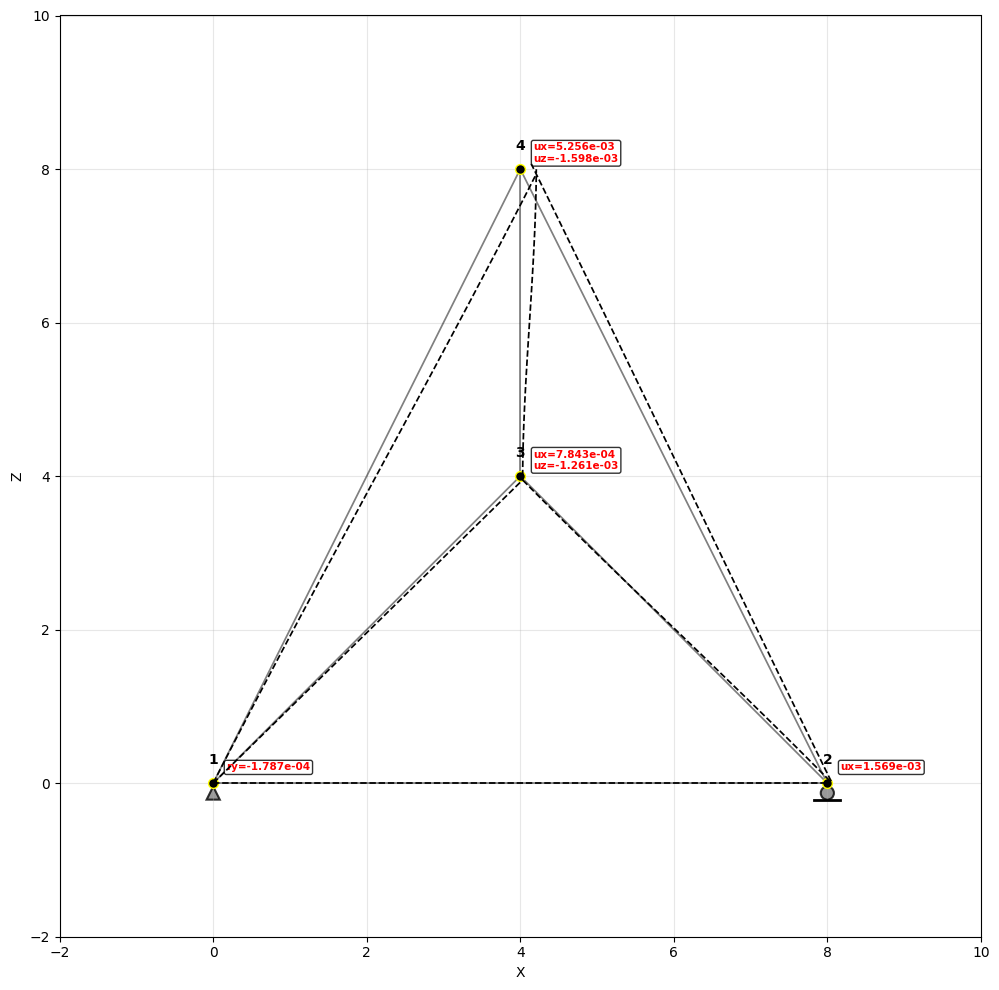

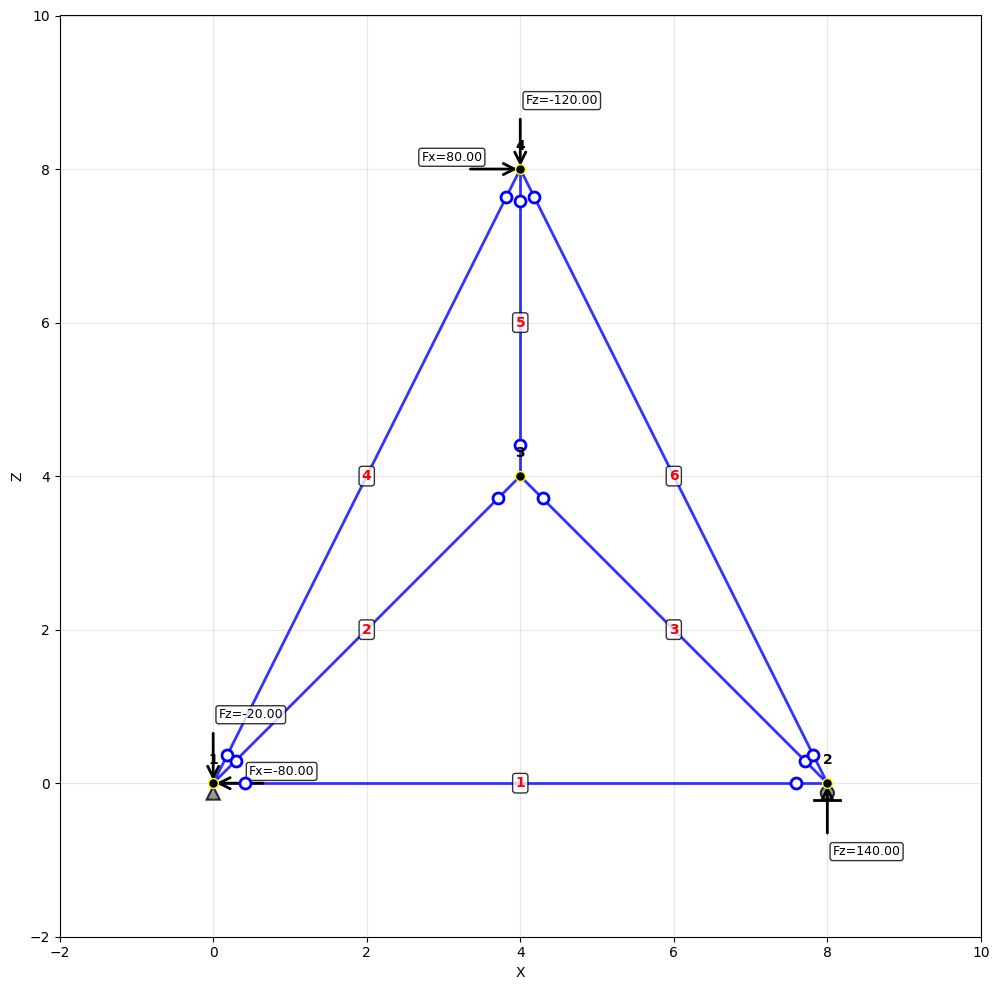

In [6]:
# Visualización de Resultados
plotter.showDeformedShape(escala=0.01)
plotter.showReactions()